In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [51]:
data = pd.read_csv('customer_segmentation.csv');

In [52]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [54]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [55]:
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])

In [56]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [57]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [58]:
data = data.dropna()

In [59]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
2,67,1.0,1.0
3,67,0.0,2.0
5,56,0.0,2.0
6,32,1.0,3.0


In [60]:
data.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [61]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [62]:
data_scaled

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

In [63]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 10)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

In [65]:
inertia_values = []
silhouette_scores = []
kmeans = range(2, 20)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)

    inertia_values.append(kmeans.inertia_)

    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

inertia_values

[20124.071092802522,
 13014.664681611672,
 9801.312707154426,
 8531.050588815437,
 7323.934017203183,
 6309.327486234028,
 5837.207684091995,
 5495.21796838509]

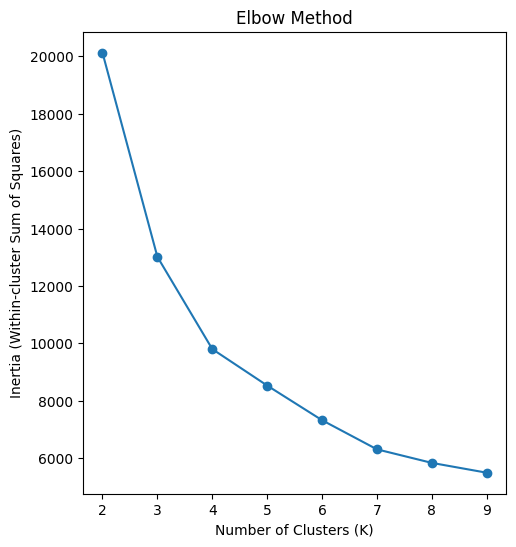

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.plot(K_range, inertia_values, marker='o', linestyle='-')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')

plt.title('Elbow Method')

plt.show()

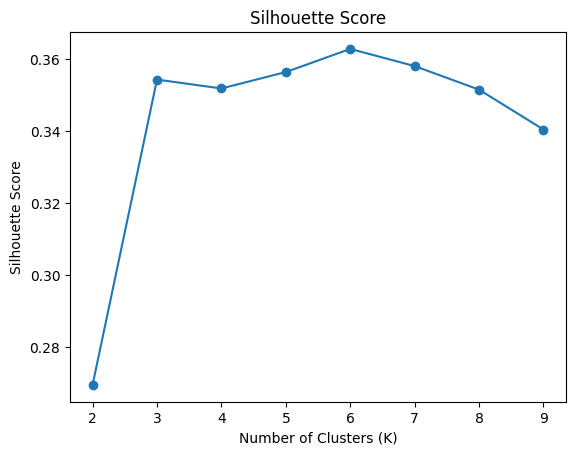

In [75]:
plt.subplot()

plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.title('Silhouette Score')

plt.show()